In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
from textblob import TextBlob,  Word
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import Text
import random
from wordcloud import WordCloud
from nltk import ngrams
from imageio import imread
from collections import Counter
#%run datuslib.ipynb

#ROBADO DE LAS NOTE DE CLASES
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
#CARGO DATASET

M_tweets = pd.read_csv('train.csv')
M_tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
def extractWordAfterSymbol(text,symbol):
    
    """ 
    RECIBE: Un texto plano que puede tener cualquier cosa
    DEVUELVE: Una lista de todos los strings que estaban precedidos por un 'symbol'
    
    
    Ejemplo User: symbol='@'
    EJEMPLO: 'Hola que tal soy @axel, y vivo en @capitalFederal' -----> [axel,capitalFederal]'
    
    Ejemplo hashtag: symbol='#'
    Ejemplo: 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all' --->[earthquake]
    """
    
    words = text.split(' ')
    
    users = []
    
    for word in words:
        userToSave = ""
        if len(word) != 0 and symbol in word:
            splittedWord = word.split(symbol)
            if len(splittedWord) > 1 and (splittedWord[0]=='' or splittedWord[0]==' ' ):
                userToSave = splittedWord[1]
        if userToSave != '':
            users.append(userToSave)
    return users

In [4]:
def takeOutSpecialCaractersFromText(text, specialCharacters = None):
    '''
    RECIBE: Un string.
    DEVUELVE: El string sin caracteres especiales. Con el parametro specialCharacters se puede decidir que caracteres sacar.
    '''
    if specialCharacters == None:
        specialCharacters = ['&','\n','<','>','=',',','.','!','%','#','*','(',')','"', '?', '$', ':', '/','\'']
    
    
    for char in specialCharacters:
        text = text.replace(char, '')
    return text

In [5]:
def textWithoutStopwords(text):
    specialCharacters = ['&','\n','<','>','=',',','.','!','%','*','(',')','"','-','_', '?', '$', ':', '/','\''] + [str(i) for i in range(0,10)]
    output=""
    for word in text.split():
        if ((word not in stop_words) | (word not in specialCharacters) ):
            output+=word
            output+=" "
    output=output[:-1]
    return output

In [6]:
def stemmedText(text):
    ps = PorterStemmer()
    toProcess=text.split()
    result=""
    for word in toProcess:
        result+=ps.stem(word)+" "
    result=result[:-1]    
    return result

In [7]:
def list2text(list):
    text=""
    for w in list:
        text+=w
        text+=" "
    text=text[:-1]    
    return text

In [8]:
def filterMoreThanTwoChar(text):   
    result=""
    for word in text.split():
        if (len(word)>1):
            result+=word
            result+=" "
    result=result[:-1]  
    return result

46.	Ver propiedades estadísticas de los tweets que mencionan otros usuarios
47.	Usar a los usuarios arrobados para ver cosas de ellos


In [9]:
M_tweets['textNoStop']=M_tweets['text'].apply(lambda x: textWithoutStopwords(x))
M_tweets['textNoStop2']=M_tweets['textNoStop'].apply(lambda x:takeOutSpecialCaractersFromText(x))
M_tweets['textNoStop3']=M_tweets['textNoStop2'].apply(lambda x:filterMoreThanTwoChar(x))
M_tweets['qWords']=M_tweets['textNoStop'].apply(lambda x: len(x.split()))
M_tweets.head()

,id,keyword,location,text,target,textNoStop,textNoStop2,textNoStop3,qWords
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,Our Deeds are the Reason of this earthquake Ma...,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,Forest fire near La Ronge Sask Canada,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,All residents asked to shelter in place are be...,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,Just got sent this photo from Ruby Alaska as s...,16


In [10]:
M_tweets['users']=M_tweets['textNoStop3'].apply(lambda x: extractWordAfterSymbol( x.lower(),'@'))
M_tweets['hashtag']=M_tweets['textNoStop'].apply(lambda x: extractWordAfterSymbol( x.lower(),'#'))
M_tweets.head()

,id,keyword,location,text,target,textNoStop,textNoStop2,textNoStop3,qWords,users,hashtag
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,Our Deeds are the Reason of this earthquake Ma...,13,[],[earthquake]
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,Forest fire near La Ronge Sask Canada,7,[],[]
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,All residents asked to shelter in place are be...,22,[],[]
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...,8,[],[wildfires]
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,Just got sent this photo from Ruby Alaska as s...,16,[],"[alaska, wildfires]"


In [11]:
M_tweets['hasUsers']=M_tweets['users'].apply(lambda x: len(x))
M_tweets['hasHashtag']=M_tweets['hashtag'].apply(lambda x: len(x))
M_tweets.head(50)

,id,keyword,location,text,target,textNoStop,textNoStop2,textNoStop3,qWords,users,hashtag,hasUsers,hasHashtag
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,Our Deeds are the Reason of this earthquake Ma...,13,[],[earthquake],0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,Forest fire near La Ronge Sask Canada,7,[],[],0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,All residents asked to shelter in place are be...,22,[],[],0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...,8,[],[wildfires],0,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,Just got sent this photo from Ruby Alaska as s...,16,[],"[alaska, wildfires]",0,2
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,#RockyFire Update => California Hwy. 20 closed...,RockyFire Update California Hwy 20 closed in ...,RockyFire Update California Hwy 20 closed in b...,18,[],"[rockyfire, cafire, wildfires]",0,3
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,#flood #disaster Heavy rain causes flash flood...,flood disaster Heavy rain causes flash floodin...,flood disaster Heavy rain causes flash floodin...,14,[],"[flood, disaster]",0,2
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,I'm on top of the hill and I can see a fire in...,Im on top of the hill and I can see a fire in ...,Im on top of the hill and can see fire in the ...,15,[],[],0,0
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,There's an emergency evacuation happening now ...,Theres an emergency evacuation happening now i...,Theres an emergency evacuation happening now i...,12,[],[],0,0
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,I'm afraid that the tornado is coming to our a...,Im afraid that the tornado is coming to our area,Im afraid that the tornado is coming to our area,10,[],[],0,0


In [12]:
M_tweetsUsers=M_tweets[~(M_tweets['hasUsers']==0)].copy()
M_tweetsNoUsers=M_tweets[(M_tweets['hasUsers']==0)].copy()
M_tweetsUsers.head()

,id,keyword,location,text,target,textNoStop,textNoStop2,textNoStop3,qWords,users,hashtag,hasUsers,hasHashtag
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,@bbcmtd Wholesale Markets ablaze http://t.co/l...,@bbcmtd Wholesale Markets ablaze httptcolHYXEO...,@bbcmtd Wholesale Markets ablaze httptcolHYXEO...,5,[bbcmtd],[],1,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,@PhDSquares #mufc they've built so much hype a...,@PhDSquares mufc theyve built so much hype aro...,@PhDSquares mufc theyve built so much hype aro...,21,[phdsquares],[mufc],1,1
43,63,ablaze,NaN,SOOOO PUMPED FOR ABLAZE ???? @southridgelife,0,SOOOO PUMPED FOR ABLAZE ???? @southridgelife,SOOOO PUMPED FOR ABLAZE @southridgelife,SOOOO PUMPED FOR ABLAZE @southridgelife,6,[southridgelife],[],1,0
54,78,ablaze,Abuja,Noches El-Bestia '@Alexis_Sanchez: happy to se...,0,Noches El-Bestia '@Alexis_Sanchez: happy to se...,Noches El-Bestia @Alexis_Sanchez happy to see ...,Noches El-Bestia @Alexis_Sanchez happy to see ...,15,[alexis_sanchez],[],1,0
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0,Set our hearts ablaze and every city was a gif...,Set our hearts ablaze and every city was a gif...,Set our hearts ablaze and every city was gift ...,22,[û_],[],1,0


# USUARIOS MAS FRECUENTES

In [13]:
freqUsers = FreqDist(takeOutSpecialCaractersFromText(list2text(M_tweetsUsers.users.sum())).split())
commonUsers=freqUsers.most_common()
top15MostUsers=commonUsers[:15]
top15MostUsers

[('youtube', 83),
 ('arianagrande', 11),
 ('potus', 9),
 ('change', 9),
 ('usatoday', 9),
 ('foxnews', 9),
 ('emmerdale', 8),
 ('djicemoon', 7),
 ('justinbieber', 7),
 ('mikeparractor', 6),
 ('stretcher', 6),
 ('towel', 6),
 ('viralspell', 5),
 ('armageddon', 5),
 ('usagov', 5)]

# USUARIOS MAS FRECUENTES EN DESASTRES

In [14]:
M_tweetsUsersDisaster=M_tweetsUsers[M_tweetsUsers['target']==1]
freqWordsDisaster = FreqDist(takeOutSpecialCaractersFromText(list2text(M_tweetsUsersDisaster.users.sum())).split())
commonWordsDisaster=freqWordsDisaster.most_common()
top15MostCommonDisaster=commonWordsDisaster[:15]
top15MostCommonDisaster

[('youtube', 18),
 ('foxnews', 8),
 ('potus', 6),
 ('usagov', 5),
 ('change', 4),
 ('ap', 4),
 ('usatoday', 4),
 ('unsuckdcmetro', 4),
 ('viralspell', 3),
 ('nbcnews', 3),
 ('michael5sos', 3),
 ('kurtschlichter', 3),
 ('sharethis', 3),
 ('reuters', 3),
 ('smh', 3)]

# USUARIOS MAS FRECUENTES EN NO DESASTRES DESASTRES

In [15]:
M_tweetsUsersNoDisaster=M_tweetsUsers[M_tweetsUsers['target']==0]
freqWordsNoDisaster = FreqDist(takeOutSpecialCaractersFromText(list2text(M_tweetsUsersNoDisaster.users.sum())).split())
commonWordsNoDisaster=freqWordsNoDisaster.most_common()
top15MostCommonNoDisaster=commonWordsNoDisaster[:15]
top15MostCommonNoDisaster

[('youtube', 65),
 ('arianagrande', 11),
 ('djicemoon', 7),
 ('emmerdale', 7),
 ('justinbieber', 7),
 ('mikeparractor', 6),
 ('change', 5),
 ('usatoday', 5),
 ('stretcher', 5),
 ('invalid', 5),
 ('towel', 5),
 ('armageddon', 4),
 ('local_arsonist', 4),
 ('lonewolffur', 4),
 ('gop', 4)]

In [16]:
M_tweetsUsersDisaster[M_tweetsUsersDisaster.users.apply(lambda x: 'usatoday' in x)].iloc[0,:].text

'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/HQsU8LWltH via @usatoday'

In [17]:
M_tweetsUsersNoDisaster[M_tweetsUsersNoDisaster.users.apply(lambda x: 'invalid' in x)].iloc[0,:].text

'@Stretcher @invalid @Grazed @Rexyy @Towel I see the programme (:'

In [18]:
df_UserFreq=pd.DataFrame(top15MostUsers)
df_UserFreqNoDisaster=pd.DataFrame(commonWordsNoDisaster)
df_UserFreqDisaster=pd.DataFrame(commonWordsDisaster)
df_UserFreqNoDisaster.columns=['users','Frecuencia Usuario No Desastres']
df_UserFreqDisaster.columns=['users','Frecuencia Usuario Desastres']
df_UserFreq.columns=['users','freq']
df_UserFreq

,users,freq
0,youtube,83
1,arianagrande,11
2,potus,9
3,change,9
4,usatoday,9
5,foxnews,9
6,emmerdale,8
7,djicemoon,7
8,justinbieber,7
9,mikeparractor,6


In [19]:
df_UserFreqDisaster.head()

,users,Frecuencia Usuario Desastres
0,youtube,18
1,foxnews,8
2,potus,6
3,usagov,5
4,change,4


In [20]:
df_UserFreqNoDisaster.head()

,users,Frecuencia Usuario No Desastres
0,youtube,65
1,arianagrande,11
2,djicemoon,7
3,emmerdale,7
4,justinbieber,7


In [21]:
df_UserFreq2=df_UserFreq.merge(df_UserFreqNoDisaster,how='left',on='users')
df_UserFreq2

,users,freq,Frecuencia Usuario No Desastres
0,youtube,83,65.0
1,arianagrande,11,11.0
2,potus,9,3.0
3,change,9,5.0
4,usatoday,9,5.0
5,foxnews,9,1.0
6,emmerdale,8,7.0
7,djicemoon,7,7.0
8,justinbieber,7,7.0
9,mikeparractor,6,6.0


In [22]:
df_UserFreq2=df_UserFreq2.merge(df_UserFreqDisaster,how='left',on='users').set_index('users').fillna(0)
df_UserFreq2

,freq,Frecuencia Usuario No Desastres,Frecuencia Usuario Desastres
users,,,
youtube,83,65.0,18.0
arianagrande,11,11.0,0.0
potus,9,3.0,6.0
change,9,5.0,4.0
usatoday,9,5.0,4.0
foxnews,9,1.0,8.0
emmerdale,8,7.0,1.0
djicemoon,7,7.0,0.0
justinbieber,7,7.0,0.0


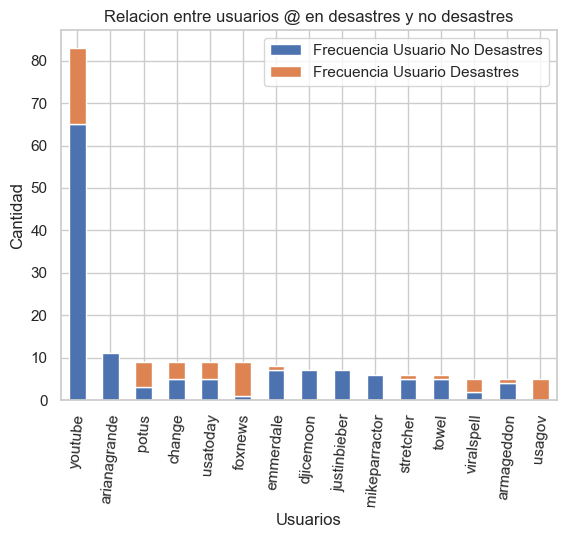

In [23]:
df_UserFreq2.drop('freq',axis=1).plot(kind='bar',stacked=True,rot=85)
plt.title('Relacion entre usuarios @ en desastres y no desastres')
plt.xlabel('Usuarios')
plt.ylabel('Cantidad')
plt.savefig('img/relacion_users_en_desastres_no_desastres.jpg')
plt.show()

In [24]:
metricsUsers=M_tweetsUsers.groupby('target')['hasUsers'].agg(['max','mean','min','size']).reset_index()
metricsUsers

,target,max,mean,min,size
0,0,8,1.348021,1,1339
1,1,5,1.330793,1,656


In [25]:
metricsNoUsers=M_tweetsNoUsers.groupby('target')['hasUsers'].agg(['size']).reset_index()
metricsNoUsers.columns=['target','Cantidad Tweets sin usuarios @']
metricsNoUsers

,target,Cantidad Tweets sin usuarios @
0,0,3003
1,1,2615


In [26]:
metricsUsers=metricsUsers[['target','size']]
metricsUsers.columns=['target','Cantidad Tweets con usuarios @']
metricsUsers

,target,Cantidad Tweets con usuarios @
0,0,1339
1,1,656


In [27]:
metricsUsersNoUsers=metricsNoUsers.merge(metricsUsers,on='target').set_index('target')
metricsUsersNoUsers=metricsUsersNoUsers.rename(index={0: 'Tweets No Desastre',1:'Tweet de Desastre'})
metricsUsersNoUsers

,Cantidad Tweets sin usuarios @,Cantidad Tweets con usuarios @
target,,
Tweets No Desastre,3003,1339
Tweet de Desastre,2615,656


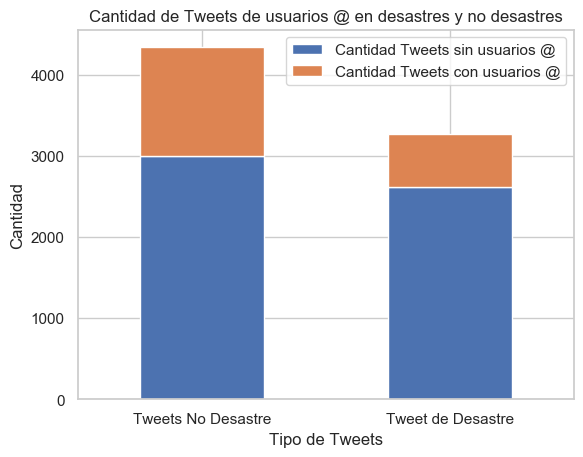

In [28]:
metricsUsersNoUsers=metricsNoUsers.merge(metricsUsers,on='target').set_index('target')
metricsUsersNoUsers=metricsUsersNoUsers.rename(index={0: 'Tweets No Desastre',1:'Tweet de Desastre'})
metricsUsersNoUsers.plot(kind='bar',stacked=True,rot=0)
plt.title('Cantidad de Tweets de usuarios @ en desastres y no desastres')
plt.xlabel('Tipo de Tweets')
plt.ylabel('Cantidad')
plt.savefig('img/relacion_users_en_tweets_totales.jpg')
plt.show()

# Cantidad de hashtag por cantidad de usuarios @

In [29]:
M_tweetsUsers.head()

,id,keyword,location,text,target,textNoStop,textNoStop2,textNoStop3,qWords,users,hashtag,hasUsers,hasHashtag
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,@bbcmtd Wholesale Markets ablaze http://t.co/l...,@bbcmtd Wholesale Markets ablaze httptcolHYXEO...,@bbcmtd Wholesale Markets ablaze httptcolHYXEO...,5,[bbcmtd],[],1,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,@PhDSquares #mufc they've built so much hype a...,@PhDSquares mufc theyve built so much hype aro...,@PhDSquares mufc theyve built so much hype aro...,21,[phdsquares],[mufc],1,1
43,63,ablaze,NaN,SOOOO PUMPED FOR ABLAZE ???? @southridgelife,0,SOOOO PUMPED FOR ABLAZE ???? @southridgelife,SOOOO PUMPED FOR ABLAZE @southridgelife,SOOOO PUMPED FOR ABLAZE @southridgelife,6,[southridgelife],[],1,0
54,78,ablaze,Abuja,Noches El-Bestia '@Alexis_Sanchez: happy to se...,0,Noches El-Bestia '@Alexis_Sanchez: happy to se...,Noches El-Bestia @Alexis_Sanchez happy to see ...,Noches El-Bestia @Alexis_Sanchez happy to see ...,15,[alexis_sanchez],[],1,0
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0,Set our hearts ablaze and every city was a gif...,Set our hearts ablaze and every city was a gif...,Set our hearts ablaze and every city was gift ...,22,[û_],[],1,0


In [30]:
M_tweetsUsersGrouped=M_tweetsUsers.groupby(['target','hasUsers']).hasHashtag.agg(['sum','mean']).unstack()#reset_index().set_index('target')
M_tweetsUsersGrouped.drop('mean',axis=1,inplace=True)
M_tweetsUsersGrouped=M_tweetsUsersGrouped.fillna(0)
M_tweetsUsersGrouped.columns=['1','2','3','4','5','6','7','8']
M_tweetsUsersGrouped

,1,2,3,4,5,6,7,8
target,,,,,,,,
0,304.0,84.0,17.0,0.0,8.0,3.0,1.0,1.0
1,163.0,18.0,25.0,1.0,5.0,0.0,0.0,0.0


In [31]:
import pygal
import pygal
from IPython.display import SVG, HTML, display
%matplotlib inline

In [32]:
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

In [33]:
M_tweetsUsersGrouped.columns + '@'

Index(['1@', '2@', '3@', '4@', '5@', '6@', '7@', '8@'], dtype='object')

In [34]:
dot_chart = pygal.Radar()
dot_chart.title = 'Cantidad de usuarios @ en relacion a Desastre-No Desastre'
dot_chart.x_labels = list(M_tweetsUsersGrouped.columns+ " Usuarios @")
listEventTweet=['No Desastre','Desastre']
for row in list(M_tweetsUsersGrouped.index):
    listTarget=[]
    for column in list(M_tweetsUsersGrouped.columns):
        listTarget.append(M_tweetsUsersGrouped.iloc[int(row),int(column)-1])
    dot_chart.add(listEventTweet[int(row)],listTarget)
        
HTML(html_pygal.format(pygal_render=dot_chart.render()))

# Cantidad de palabras de los tweets ordenados por cantidad de users @

In [35]:
qWordsTweetsUsers=M_tweetsUsers.groupby('hasUsers').qWords.agg(['sum'])
qWordsTweetsUsers.columns=['Cantidad de palabras']
qWordsTweetsUsers#['promedio']=qWordsTweetsUsers['Cantidad de palabras'].mean()

,Cantidad de palabras
hasUsers,
1,23190
2,5238
3,1338
4,448
5,241
6,61
7,15
8,11


In [36]:
#qWordsTweetsUsers

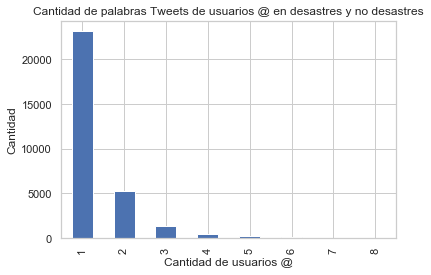

In [37]:
#qWordsTweetsUsers.promedio.plot()
qWordsTweetsUsers['Cantidad de palabras'].plot.bar()
plt.title('Cantidad de palabras Tweets de usuarios @ en desastres y no desastres')
plt.xlabel('Cantidad de usuarios @')
plt.ylabel('Cantidad')
plt.savefig('img/cantidad_palabras_users_en_tweets_@.jpg')
plt.show()